upload clean_data_only and 240 datasets and cnn model path
before running cells

In [ ]:
!unzip 240.zip

Archive:  240.zip
   creating: 240/
   creating: 240/battery/
  inflating: 240/battery/battery1.jpg  
  inflating: 240/battery/battery10.jpg  
  inflating: 240/battery/battery100.jpg  
  inflating: 240/battery/battery101.jpg  
  inflating: 240/battery/battery102.jpg  
  inflating: 240/battery/battery103.jpg  
  inflating: 240/battery/battery104.jpg  
  inflating: 240/battery/battery105.jpg  
  inflating: 240/battery/battery106.jpg  
  inflating: 240/battery/battery107.jpg  
  inflating: 240/battery/battery108.jpg  
  inflating: 240/battery/battery109.jpg  
  inflating: 240/battery/battery11.jpg  
  inflating: 240/battery/battery110.jpg  
  inflating: 240/battery/battery111.jpg  
  inflating: 240/battery/battery112.jpg  
  inflating: 240/battery/battery113.jpg  
  inflating: 240/battery/battery114.jpg  
  inflating: 240/battery/battery115.jpg  
  inflating: 240/battery/battery116.jpg  
  inflating: 240/battery/battery117.jpg  
  inflating: 240/battery/battery118.jpg  
  inflating: 240/b

In [ ]:
!unzip clean_data_only.zip

Archive:  clean_data_only.zip
   creating: clean_data_only/
  inflating: clean_data_only/10.jpg  
  inflating: clean_data_only/100.jpg  
  inflating: clean_data_only/1002.jpg  
  inflating: clean_data_only/1010.jpg  
  inflating: clean_data_only/1013.jpg  
  inflating: clean_data_only/1044.jpg  
  inflating: clean_data_only/105.jpg  
  inflating: clean_data_only/1057.jpg  
  inflating: clean_data_only/1062.jpg  
  inflating: clean_data_only/1085.jpg  
  inflating: clean_data_only/1089.jpg  
  inflating: clean_data_only/109.jpg  
  inflating: clean_data_only/1097.jpg  
  inflating: clean_data_only/1103.jpg  
  inflating: clean_data_only/1110.jpg  
  inflating: clean_data_only/1111.jpg  
  inflating: clean_data_only/1117.jpg  
  inflating: clean_data_only/1126.jpg  
  inflating: clean_data_only/1128.jpg  
  inflating: clean_data_only/1132.jpg  
  inflating: clean_data_only/1135.jpg  
  inflating: clean_data_only/1137.jpg  
  inflating: clean_data_only/1148.jpg  
  inflating: clean_data_o

**binary classification model for 240*240 image sizes split in 70-30 ratio**

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Paths for datasets
garbage_dir = '240'
non_garbage_dir = 'clean_data_only'

def load_images_and_labels(garbage_dir, non_garbage_dir):
    images = []
    labels = []

    for root, _, files in os.walk(garbage_dir):
        for file in files:
            if file.lower().endswith(('.jpg','.png','.jpeg')):
                img_path = os.path.join(root, file)
                img = imread(img_path, as_gray=True)
                img_resized = resize(img, (240, 240))
                images.append(img_resized)
                labels.append(1)

    # Non-garbage images (label=0)
    for file in os.listdir(non_garbage_dir):
        if file.lower().endswith(('.jpg','.png','.jpeg')):
            img_path = os.path.join(non_garbage_dir, file)
            img = imread(img_path, as_gray=True)
            img_resized = resize(img, (240, 240))
            images.append(img_resized)
            labels.append(0)
    return images, labels


In [ ]:
X, y = load_images_and_labels(garbage_dir, non_garbage_dir)

# Extract HOG features
features = [hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9) for image in X]

# Split data 80-20
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [ ]:
# Train SVM classifier
binary_model = SVC(kernel='linear')
binary_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
train_preds = binary_model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print(f"Training Accuracy: {train_acc*100:.2f}%")


Training Accuracy: 100.00%


In [ ]:
# Evaluate
preds = binary_model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Test Accuracy: {acc*100:.2f}%")


Test Accuracy: 98.52%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_bin = accuracy_score(y_test, preds)
prec_bin = precision_score(y_test, preds, average='binary')
recall_bin = recall_score(y_test, preds, average='binary')
f1_bin = f1_score(y_test,preds, average='binary')


In [ ]:
print(f"Accuracy: {acc_bin:.2f}")
print(f"Precision: {prec_bin:.2f}")
print(f"Recall: {recall_bin:.2f}")
print(f"F1 Score: {f1_bin:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
F1 Score: 0.99


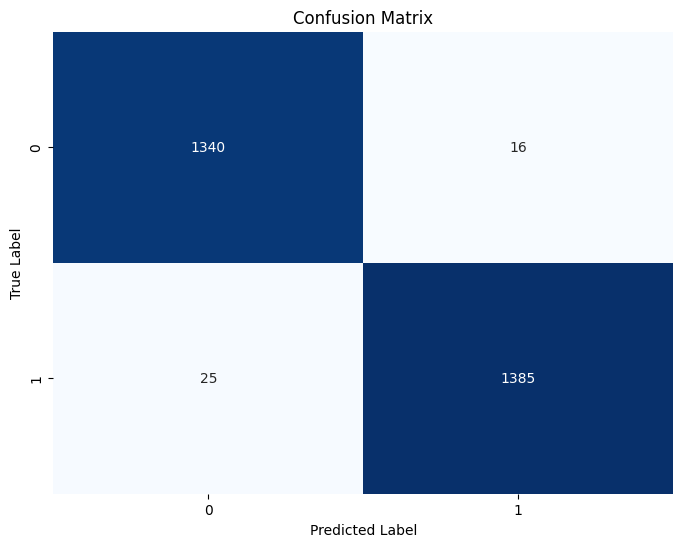

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()